In [1]:
import os
from math import log
import pandas as pd
from PIL import Image
import seaborn as sns
import cv2

import tensorflow as tf

import keras
from keras import layers
from keras.models import Sequential, Model
from tensorflow.python.keras.models import Input
from tensorflow.keras.layers import Dense, Dropout, Flatten, concatenate, BatchNormalization, Conv2D, MaxPooling2D

import tensorflow.keras
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn import metrics

files :  ['01azqd4InC7m9JpocGv5.asm', '01azqd4InC7m9JpocGv5.bytes', '01azqd4InC7m9JpocGv5.bytes.png', '01IsoiSMh5gxyDYTl4CB.asm', '01IsoiSMh5gxyDYTl4CB.bytes', '01IsoiSMh5gxyDYTl4CB.bytes.png', '01jsnpXSAlgw6aPeDxrU.asm', '01jsnpXSAlgw6aPeDxrU.bytes', '01jsnpXSAlgw6aPeDxrU.bytes.png', '01kcPWA9K2BOxQeS5Rju.asm', '01kcPWA9K2BOxQeS5Rju.bytes', '01kcPWA9K2BOxQeS5Rju.bytes.png', '01SuzwMJEIXsK7A8dQbl.asm', '01SuzwMJEIXsK7A8dQbl.bytes', '01SuzwMJEIXsK7A8dQbl.bytes.png', '02IOCvYEy8mjiuAQHax3.asm', '02IOCvYEy8mjiuAQHax3.bytes', '02IOCvYEy8mjiuAQHax3.bytes.png', '02JqQ7H3yEoD8viYWlmS.asm', '02JqQ7H3yEoD8viYWlmS.bytes', '02JqQ7H3yEoD8viYWlmS.bytes.png', '02K5GMYITj7bBoAisEmD.asm', '02K5GMYITj7bBoAisEmD.bytes', '02K5GMYITj7bBoAisEmD.bytes.png', '02mlBLHZTDFXGa7Nt6cr.asm', '02mlBLHZTDFXGa7Nt6cr.bytes', '02mlBLHZTDFXGa7Nt6cr.bytes.png', '02MRILoE6rNhmt7FUi45.asm', '02MRILoE6rNhmt7FUi45.bytes', '02MRILoE6rNhmt7FUi45.bytes.png', '02zcUmKV16Lya5xqnPGB.asm', '02zcUmKV16Lya5xqnPGB.bytes', '02zcUmKV16L

KeyboardInterrupt: 

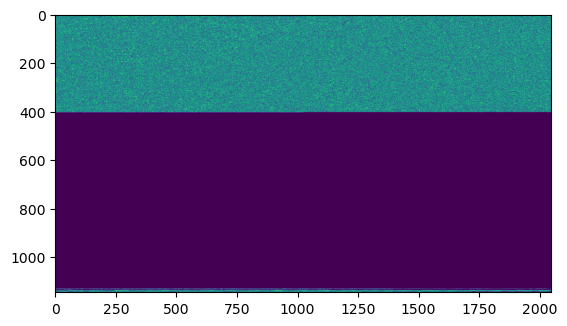

In [3]:
def convertAndSave(array,name):
    print('Processing '+name)
    if array.shape[1]!=16: #If not hexadecimal
        assert(False)
    b=int((array.shape[0]*16)**(0.5))
    b=2**(int(log(b)/log(2))+1)
    a=int(array.shape[0]*16/b)
    array=array[:a*b//16,:]
    array=np.reshape(array,(a,b))
    im = Image.fromarray(np.uint8(array))
    im.save(path+'\\'+name+'.png', "PNG")
    return im

files=os.listdir(root)
print('files : ',files)

#We will process files one by one.
for counter, name in enumerate(files):
        #We only process .bytes files from our folder.
        if '.bytes' != name[-6:]:
            continue
        f=open(root+'/'+name)
        array=[]
        for line in f:
            xx=line.split()
            if len(xx)!=17:
                continue
            array.append([int(i,16) if i!='??' else 0 for i in xx[1:] ])
        plt.imshow(convertAndSave(np.array(array),name))
        del array
        f.close()

In [2]:
path = "D:\Projects\ISAA\Malware images"
root = "Z:/Dataset/train"

In [3]:
from keras.preprocessing.image import ImageDataGenerator
path_root = "D:\Projects\ISAA\malimg_paper_dataset_imgs"
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(64,64), batch_size=10000)

Found 9339 images belonging to 25 classes.


In [4]:
imgs, labels = next(batches)

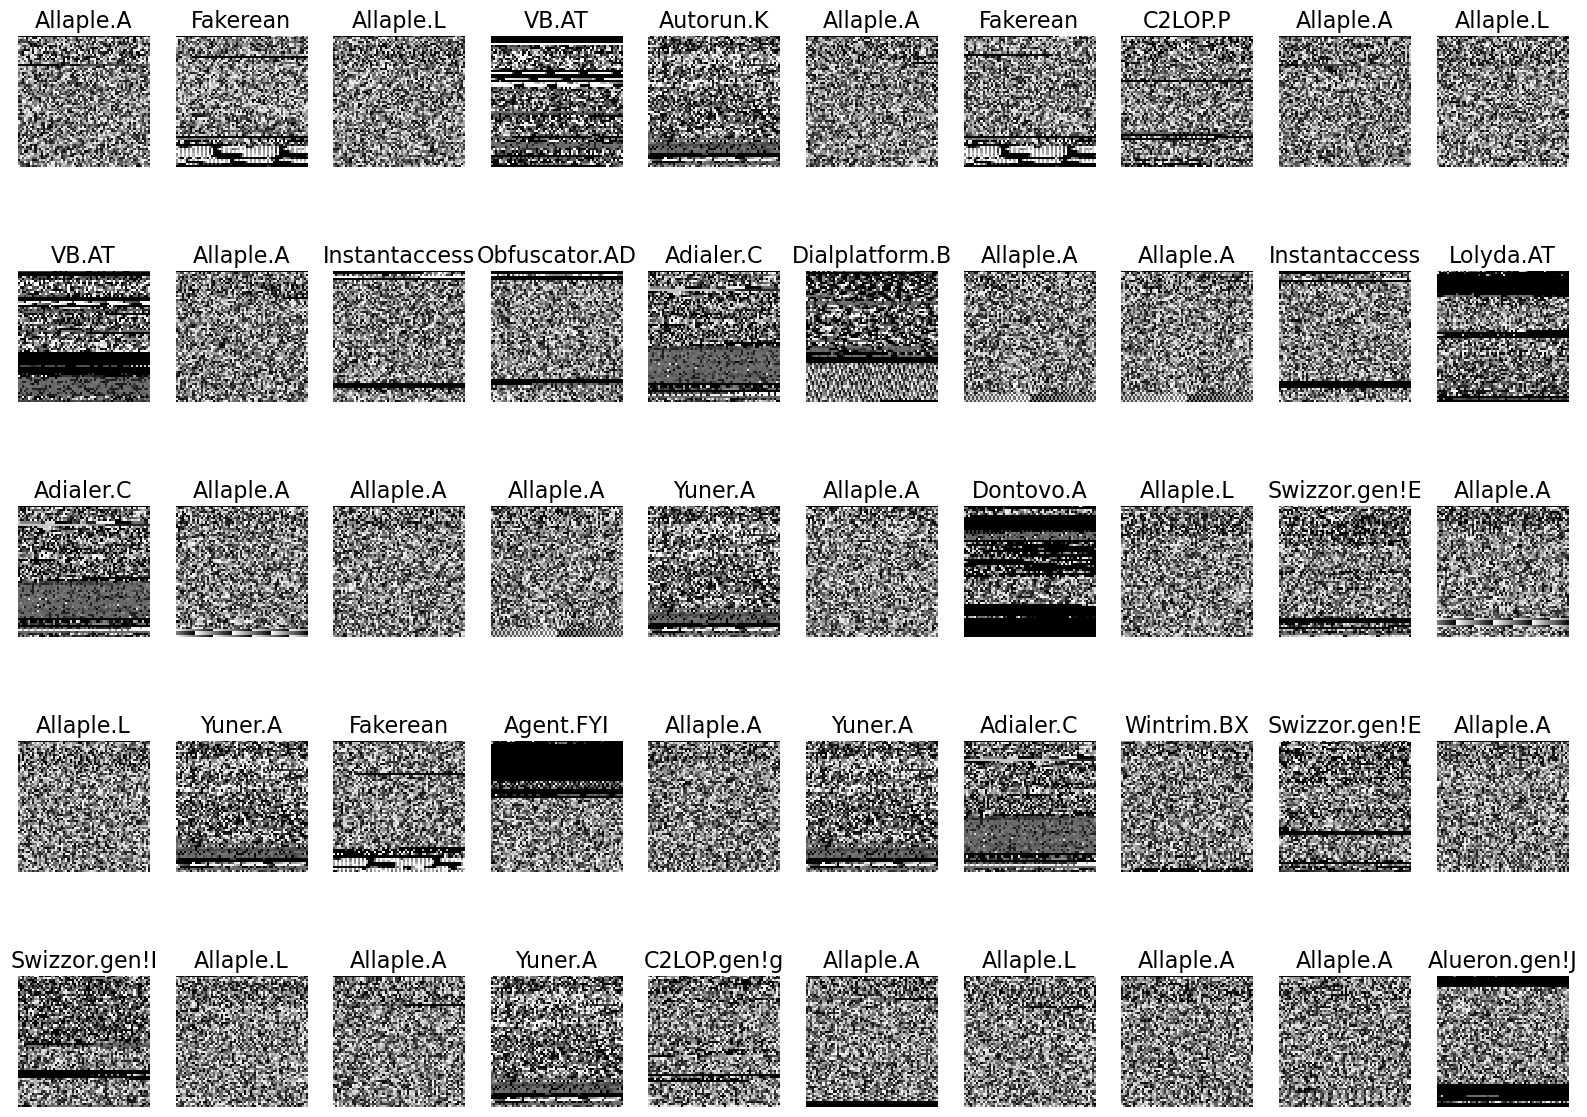

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(batches.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
        
plots(imgs, titles = labels)

<BarContainer object of 25 artists>

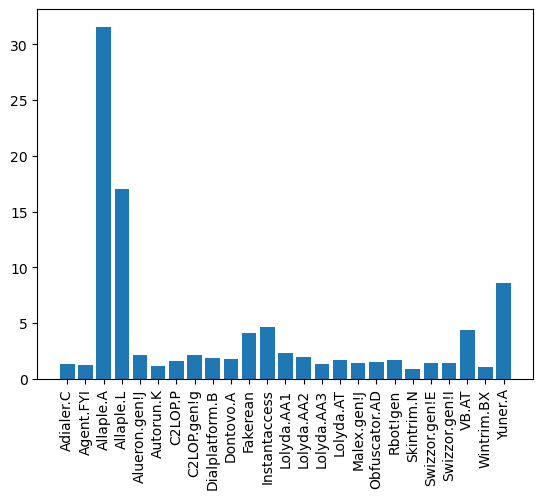

In [8]:
classes = batches.class_indices.keys()
perc = (sum(labels)/labels.shape[0])*100

plt.xticks(rotation='vertical')
plt.bar(classes,perc)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

In [ ]:
num_classes = 25

In [8]:
def malware_model():
    Malware_model = Sequential()
    Malware_model.add(Conv2D(30, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(64,64,3)))

    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(15, (3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(rate = 1-0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(128, activation='relu'))
    Malware_model.add(Dropout(rate = 0.5))
    Malware_model.add(Dense(50, activation='relu'))
    Malware_model.add(Dense(num_classes, activation='softmax'))
    Malware_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return Malware_model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 30)        840       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 30)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 15)        4065      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 15)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 15)        0         
                                                                 
 flatten_1 (Flatten)         (None, 2940)              0

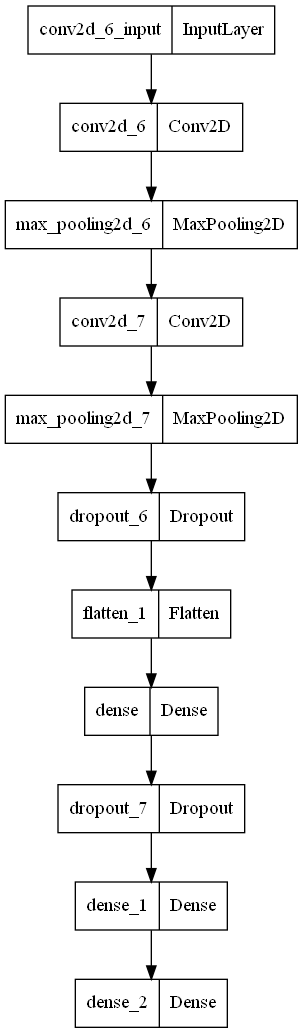

In [9]:
Malware_model = malware_model()
Malware_model.summary()

keras.utils.plot_model(Malware_model)

In [20]:
#Y-CNN

def malware_model_y():
    img_size = 64
    left_inputs = Input(shape=(img_size,img_size,3))
    filters=32
    x = left_inputs
    for i in range(3):
        x = Conv2D(filters,3,activation='relu',padding='same')(x)
        x = Dropout(0.3)(x)
        x = MaxPooling2D()(x)
        filters*=2
        
    right_inputs=Input(shape=(img_size,img_size,3))
    y=right_inputs
    filters=32
    
    for i in range(3):
        y = Conv2D(filters,3,activation='relu',padding='same',dilation_rate=2)(y)
        y = Dropout(0.3)(y)
        y = MaxPooling2D()(y)
        filters*=2
        
    y = concatenate([x,y])
    y = Flatten()(y)
    y = Dropout(0.3)(y)
    op = Dense(num_classes,activation='softmax')(y)

    
    model = Model(inputs=[left_inputs,right_inputs],outputs=op)
    model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_20 (Conv2D)             (None, 64, 64, 32)   896         ['input_1[0][0]']                
                                                                                                  
 conv2d_23 (Conv2D)             (None, 64, 64, 32)   896         ['input_2[0][0]']                
                                                                                              

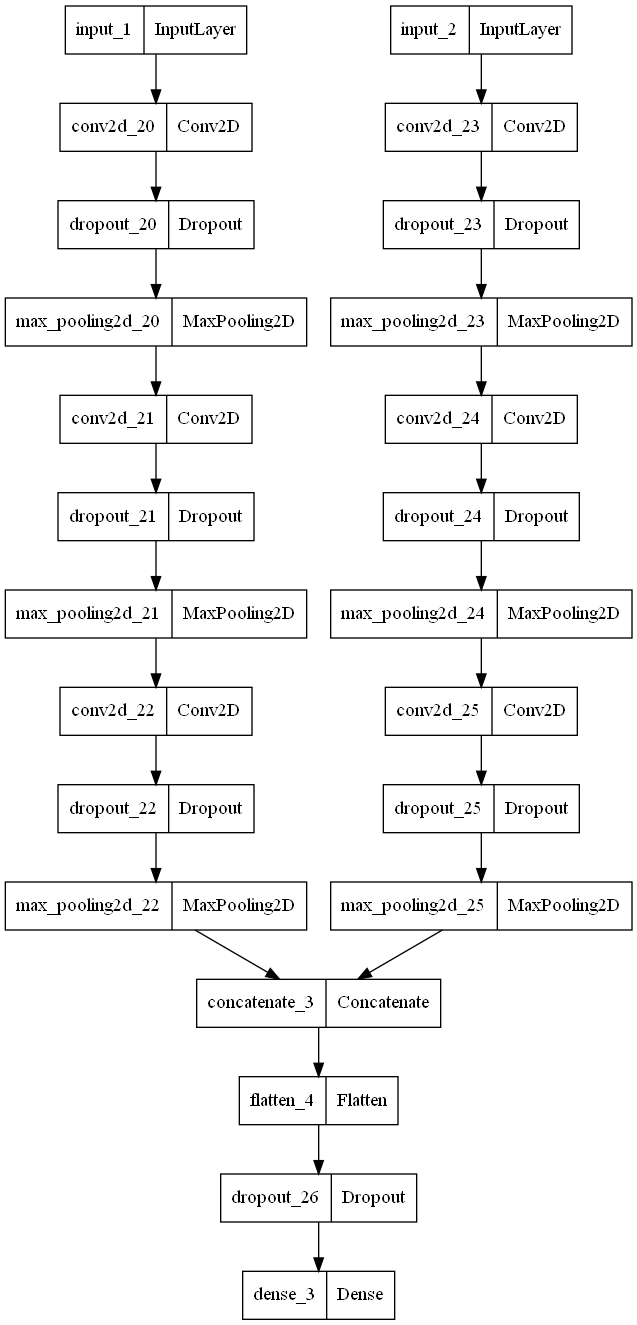

In [24]:
Mal_model = malware_model_y()
Mal_model.summary()
keras.utils.plot_model(Mal_model)

In [26]:
from sklearn.utils import class_weight
y_train_new = np.argmax(y_train, axis=1)
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                 classes = np.unique(y_train_new),
                                                 y = y_train_new)


In [27]:
Malware_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [13]:
scores = Malware_model.evaluate(X_test, y_test)

88/88 [==============================] - 2s 19ms/step - loss: 0.1486 - accuracy: 0.9468


In [15]:
X_train.shape

(6537, 64, 64, 3)

In [17]:
print('Final CNN accuracy: ', scores[1])

Final CNN accuracy:  0.9468237161636353


In [13]:
y_pred = np.argmax(Malware_model.predict(X_test), axis=-1)
y_pred

88/88 [==============================] - 2s 19ms/step


array([17, 17, 12, ..., 12, 14, 12], dtype=int64)

In [18]:
y_test2 = np.argmax(y_test, axis=1)
c_matrix = metrics.confusion_matrix(y_test2, y_pred_classes)
y_test2

array([ 2,  7, 18, ...,  2, 23, 13], dtype=int64)

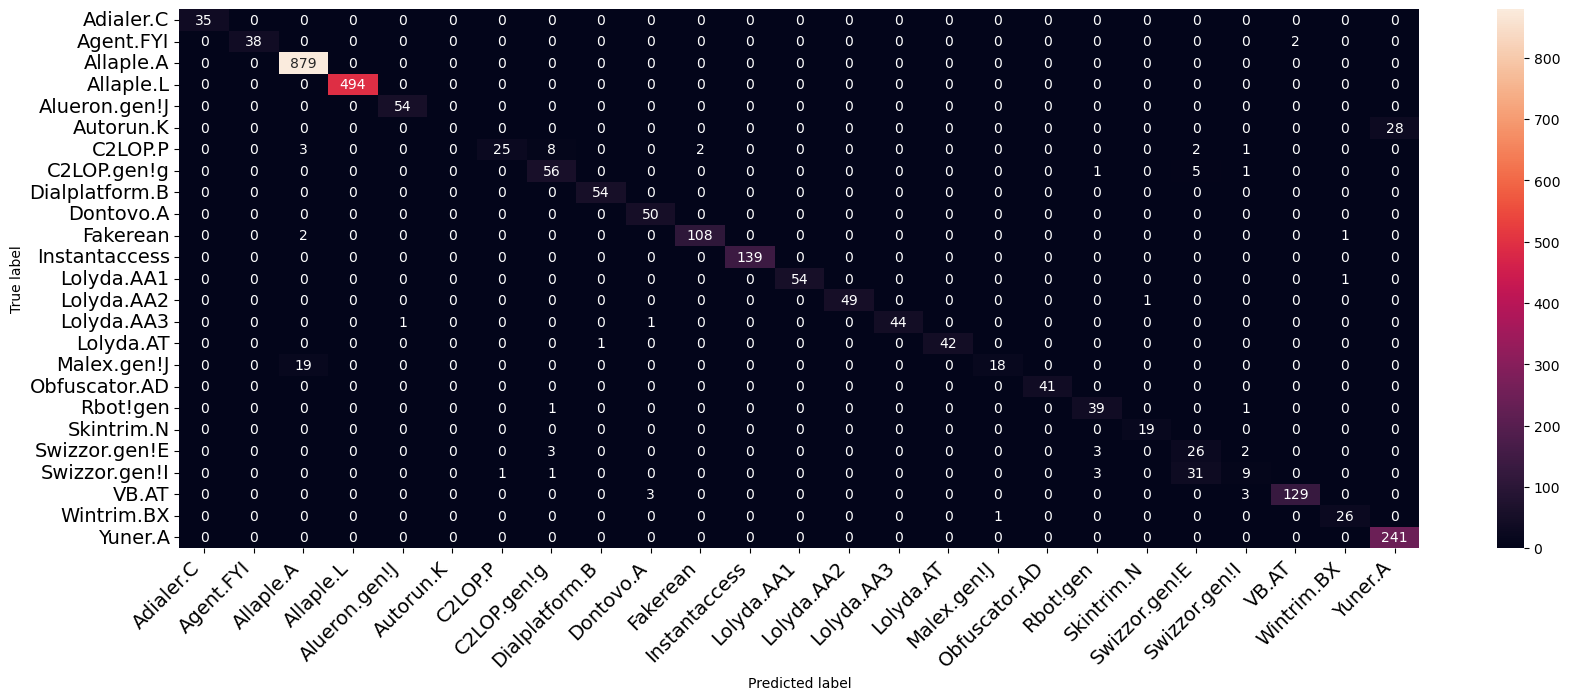

In [20]:
import seaborn as sns
import pandas as pd
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
class_names= batches.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (20,7), fontsize=14)

In [8]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

NameError: name 'imgs' is not defined

In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from IPython import display
BUFFER_SIZE = 60000
BATCH_SIZE = 256
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [90]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

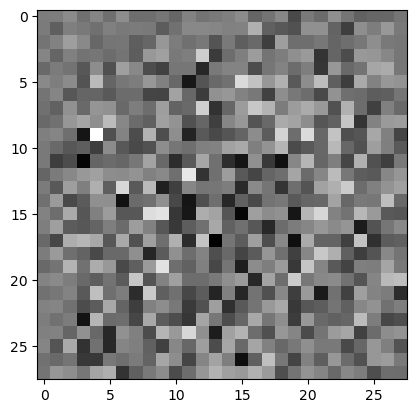

In [96]:
generator = make_generator_model()

noise = tf.random.normal(Flatten()(imgs))
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [97]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-0.0020882]], shape=(1, 1), dtype=float32)


In [94]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [81]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [82]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [83]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [84]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [85]:
EPOCHS = 15
noise_dim = 64
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [86]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return gen_loss, disc_loss

In [35]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [ ]:
train(train_dataset, EPOCHS)

In [5]:
newroot = "D:/Projects/ISAA/Newfolder"

In [9]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


dataset = keras.preprocessing.image_dataset_from_directory(
    directory=newroot, label_mode=None, image_size=(64, 64), batch_size=32,
    shuffle=True
).map(lambda x: x/255.0)

discriminator = keras.Sequential(
    [
        keras.Input(shape=(64,64,3)),
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(0.2),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ]
)

print(discriminator.summary())

latent_dim = 128
generator = keras.Sequential(
    [
        layers.Input(shape=(latent_dim,)),
        layers.Dense(8*8*128),
        layers.Reshape((8, 8, 128)),
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(0.2),
        layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(0.2),
        layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(0.2),
        layers.Conv2D(3, kernel_size=5, padding="same", activation="sigmoid"),
    ]
)
generator.summary()

opt_gen = keras.optimizers.Adam(1e-4)
opt_disc = keras.optimizers.Adam(1e-4)
loss_fn = keras.losses.BinaryCrossentropy()

for epoch in range(5):
    for idx, real in enumerate(tqdm(dataset)):
        batch_size = real.shape[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, latent_dim))
        fake = generator(random_latent_vectors)

        if idx % 10 == 0:
            img = keras.preprocessing.image.array_to_img(fake[0])
            img.save(f"D:\Projects\ISAA\generated_images\generated_img{epoch}_{idx}_.png")
            decision = discriminator(fake)
        ### Train Discriminator: max log(D(x)) + log(1 - D(G(z))
        with tf.GradientTape() as disc_tape:
            loss_disc_real = loss_fn(tf.ones((batch_size, 1)), discriminator(real))
            loss_disc_fake = loss_fn(tf.zeros(batch_size, 1), discriminator(fake))
            loss_disc = (loss_disc_real + loss_disc_fake)/2

        grads = disc_tape.gradient(loss_disc, discriminator.trainable_weights)
        opt_disc.apply_gradients(
            zip(grads, discriminator.trainable_weights)
        )

        ### Train Generator min log(1 - D(G(z)) <-> max log(D(G(z))
        with tf.GradientTape() as gen_tape:
            fake = generator(random_latent_vectors)
            output = discriminator(fake)
            loss_gen = loss_fn(tf.ones(batch_size, 1), output)

        grads = gen_tape.gradient(loss_gen, generator.trainable_weights)
        opt_gen.apply_gradients(
            zip(grads, generator.trainable_weights)
        )


Found 3187 files belonging to 1 classes.
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        3136      
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 32, 32, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 128)       131200    
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 128)         262272    
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 8, 8, 128)         0         
                                                                 
 flatten_3 (F

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [13:16<00:00,  7.97s/it]
